# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

#### This project aims to predict the future job salaries with exisitng salaries and job descriptions from current job postings. This model can really help the job seeker to narrow down the job searhcing process by eliminating jobs with salaries out of their expectation. 

In [41]:
#import libraries
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
import numpy as np
%matplotlib inline

#personal info
__author__ = "Ian Wang"
__email__ = "wkon621@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#load the data into a Pandas dataframe

#loading the data
df_features = pd.read_csv("train_features.csv")
df_salaries = pd.read_csv("train_salaries.csv")
df_test = pd.read_csv("test_features.csv")

#merge feature and salaries df off jobId
df = pd.merge(df_features, df_salaries, on = 'jobId')

#Inspect entire salary dataset with df.head
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [3]:
#Inspect the data type to see if there is any invlaid data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


### ---- 3 Clean the data ----

In [4]:
#look for missing values 
df.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

###### No missing values identified. What if 'yearsExperience' , 'milesFromMetropolis ' , 'salary' (all int64 dtype)  columns contain value of 0 ?

In [5]:
df.eq(0).sum()

jobId                      0
companyId                  0
jobType                    0
degree                     0
major                      0
industry                   0
yearsExperience        39839
milesFromMetropolis    10123
salary                     5
dtype: int64

###### 0 year of experiene is reasonable beacsue a new employee could have experience less than 1 year. An occurence of 0 miles from Metropolis could simply means he lives in the metropolis.  However, someone with 0 salary means he is not under the offical payroll; thus, I will remove those data points

In [6]:
# dropping observations which have salary as 0
df.drop(df[df['salary'] == 0].index, inplace=True)
df.eq(0).sum()

jobId                      0
companyId                  0
jobType                    0
degree                     0
major                      0
industry                   0
yearsExperience        39839
milesFromMetropolis    10123
salary                     0
dtype: int64

In [7]:
#Rename columns for better readability
df_col= ['jobId','companyId', 'JobType', 'degree', 'major', 'industry', 'YrsExp', 'MilesfMetropolis', 'salary']
df.columns = df_col
df.head()

,jobId,companyId,JobType,degree,major,industry,YrsExp,MilesfMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [8]:
#Check for the compostion of each categorical varaible
print(f'Unique values of jobtype column are: ,{df.JobType.unique()}' )
print(f'\nUnique values of degree column are: ,{df.degree.unique()}' )
print(f'\nUnique values of major column are: {df.major.unique()}' )
print(f'\nUnique values of industry column are: {df.industry.unique()}')

Unique values of jobtype column are: ,['CFO' 'CEO' 'VICE_PRESIDENT' 'MANAGER' 'JUNIOR' 'JANITOR' 'CTO' 'SENIOR']

Unique values of degree column are: ,['MASTERS' 'HIGH_SCHOOL' 'DOCTORAL' 'BACHELORS' 'NONE']

Unique values of major column are: ['MATH' 'NONE' 'PHYSICS' 'CHEMISTRY' 'COMPSCI' 'BIOLOGY' 'LITERATURE'
 'BUSINESS' 'ENGINEERING']

Unique values of industry column are: ['HEALTH' 'WEB' 'AUTO' 'FINANCE' 'EDUCATION' 'OIL' 'SERVICE']


In [9]:
#Inspect duplicate jobid
df.jobId.value_counts(ascending=False)

JOB1362684503377    1
JOB1362684763747    1
JOB1362684493775    1
JOB1362685230838    1
JOB1362684840095    1
                   ..
JOB1362685331505    1
JOB1362685319296    1
JOB1362685185323    1
JOB1362685156069    1
JOB1362685309922    1
Name: jobId, Length: 999995, dtype: int64

### ---- 4 Explore the data (EDA) ----

In [10]:
# Glance the distribution of numerical data
df.describe()

,YrsExp,MilesfMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


### Numerical Data EDA

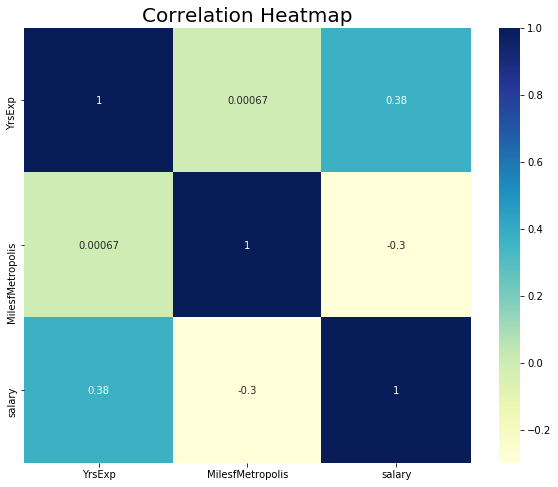

,YrsExp,MilesfMetropolis,salary
YrsExp,1.000000,0.000672,0.375013
MilesfMetropolis,0.000672,1.000000,-0.297686
salary,0.375013,-0.297686,1.000000


In [11]:
#Create a correlation heatmap and a correlation table

plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)
plt.title("Correlation Heatmap", fontsize= 20)
plt.show()
df.corr()

###### There is a weak postive correlation between YrsExp and Salary. While MilesfMetropolis doesnt seem to affect salary much. Next, we will plot the line plot the examine whether there is a linear correaltion between distance, experience, and salary

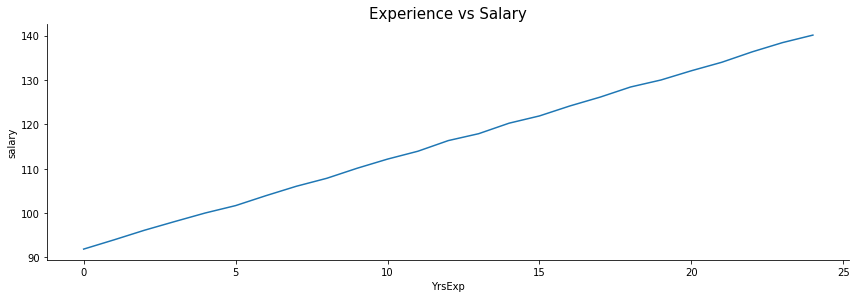

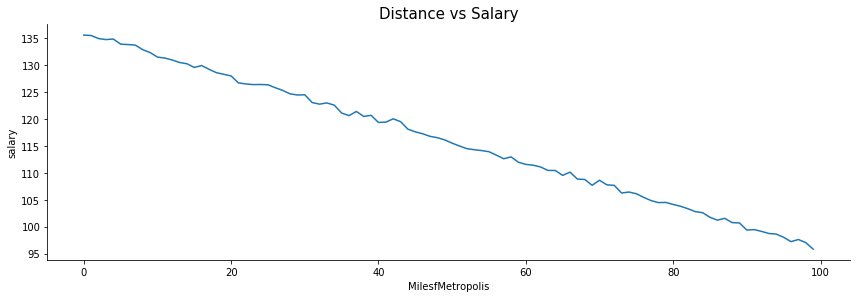

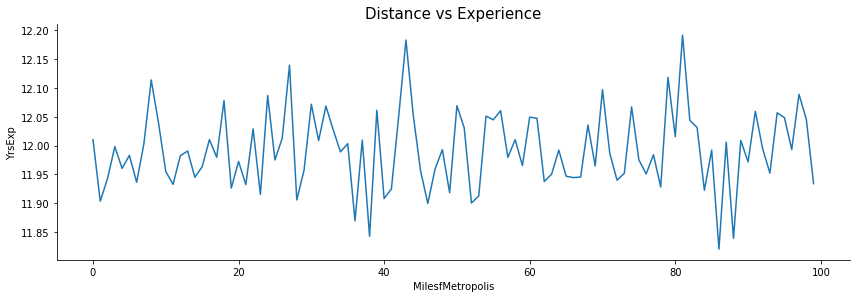

In [12]:
#Experience vs Salary
sns.relplot(x='YrsExp', y = 'salary', kind='line', ci=None, data=df, height = 4, aspect = 3)
plt.title('Experience vs Salary', fontsize=15)
plt.show()

#Distance vs Salary
sns.relplot(x='MilesfMetropolis', y='salary', kind='line', ci=None, data=df,height = 4, aspect = 3)
plt.title('Distance vs Salary', fontsize=15)
plt.show()

#Distance vs Experience 
sns.relplot(x='MilesfMetropolis', y = 'YrsExp', kind = 'line',ci=None, data=df,height = 4, aspect = 3 )
plt.title('Distance vs Experience', fontsize=15)
plt.show()

###### From the above graphs, we can see that salaries generally decrease as distance from Metropolis increases. Also, salaries tend to increase as years of experience increases. There is no significant relationship between years of experience and miles from Metropolis.

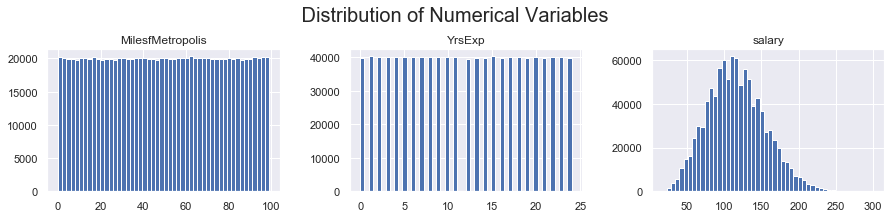

In [13]:
#pick out only the numerical data and plot only yearsexp and salary for the distribution 
df_num= df.iloc[:,5:9]

#distribution of numerical variables
sns.set(style='darkgrid')
df_num.hist(bins=50, figsize=(15, 6), layout=(2, 3))
plt.suptitle(" Distribution of Numerical Variables", fontsize = 20)
plt.show()

###### These 3 graphical distribution of the numerical variables offer some valuable insights. The distance from Metropolis has a uniform distribution, showing all observations have similar distance to Metropolis. The salary graph shows slight skewness to the right, but the shape overall follows normal distribution. The mean salary is higher than the median of salary for this dataset. The years of experience variable again has a uniform shape. This is explained by good sampling, and again, there is no need for any resampling methods.

### Categorical Variables EDA

In [14]:
job_type_summary = df.groupby('JobType')
job_type_summary.mean()

,YrsExp,MilesfMetropolis,salary
JobType,,,
CEO,11.998269,49.478458,145.311425
CFO,11.990440,49.572715,135.458547
CTO,12.010860,49.580847,135.481067
JANITOR,11.969657,49.443815,70.813045
JUNIOR,11.992383,49.660508,95.333087
MANAGER,11.987284,49.498354,115.368518
SENIOR,11.996624,49.572558,105.487775
VICE_PRESIDENT,11.993700,49.428222,125.368630


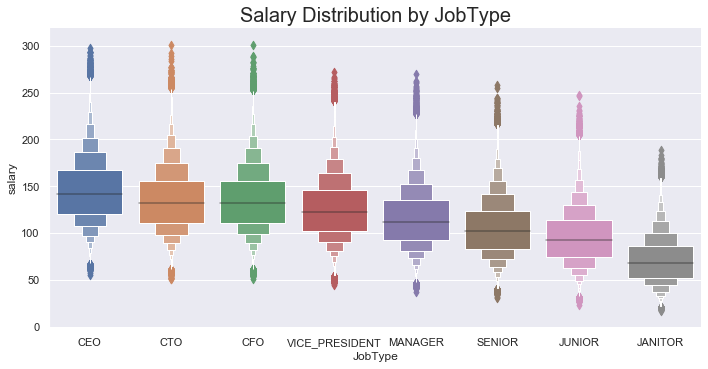

In [15]:
#ordered_type = ['CFO', 'CEO','CTO', 'VICE_PRESIDENT', 'MANAGER', "SENIOR", "JUNIOR", "JANITOR"]
sns.catplot(x='JobType', y='salary', kind='boxen', data=df, height=5,
    aspect=2, order=["CEO","CTO","CFO","VICE_PRESIDENT","MANAGER","SENIOR","JUNIOR","JANITOR"])
plt.title("Salary Distribution by JobType", fontsize= 20)
plt.show()

###### Not surprisingly, CEO jobtype has the highest average salary among all job types. VP has the highest mean salary among those who are not C-levels

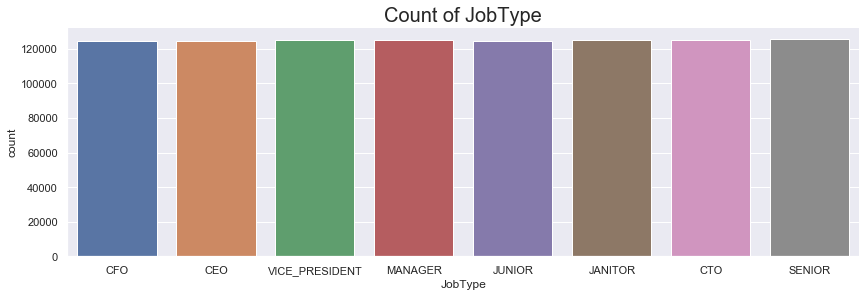

In [16]:
sns.catplot(x='JobType', kind='count', data=df, height = 4, aspect =3 )
plt.title('Count of JobType', fontsize=20)
plt.show()

In [17]:
job_type_summary = df.groupby('major')
job_type_summary.mean()

,YrsExp,MilesfMetropolis,salary
major,,,
BIOLOGY,11.991213,49.524487,127.932664
BUSINESS,12.011244,49.630251,135.648980
CHEMISTRY,11.975185,49.553104,129.072085
COMPSCI,11.979086,49.676099,132.075605
ENGINEERING,11.987883,49.577619,138.441342
LITERATURE,12.010991,49.694363,124.423097
MATH,11.992266,49.423045,133.322042
NONE,11.993151,49.485358,102.583864
PHYSICS,11.984626,49.554956,130.372436


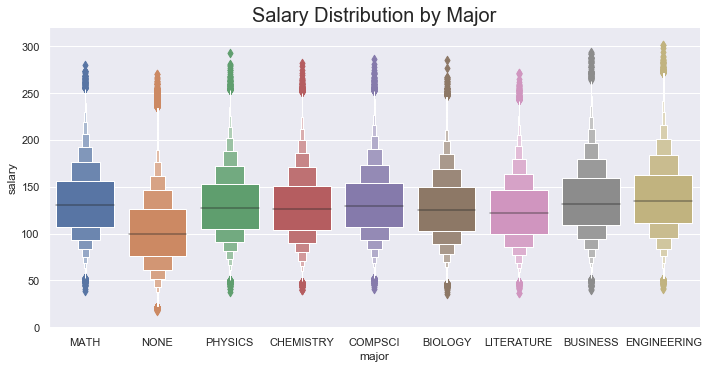

In [18]:
sns.catplot(x='major', y='salary', kind='boxen',data = df , height=5, aspect =2, )
plt.title("Salary Distribution by Major", fontsize = 20)
plt.show()

###### Overall, mean salary of different majors are roughly the same. Engineering majors have the highest mean salary while non has the lowest mean salary and the difference is about 25

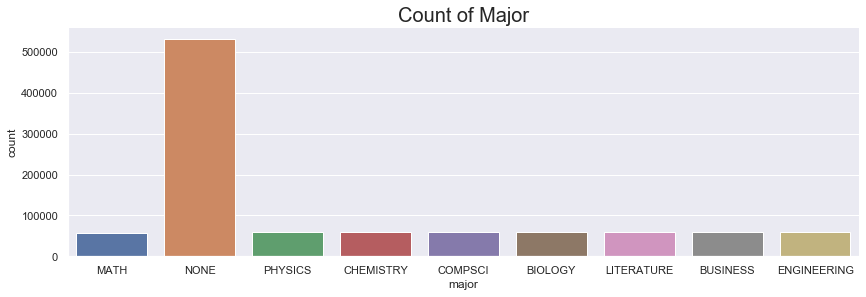

In [19]:
sns.catplot(x='major', data =df , kind='count', height = 4, aspect = 3)
plt.title('Count of Major', fontsize=20)
plt.show()

In [20]:
job_type_summary = df.groupby('industry')
job_type_summary.mean()

,YrsExp,MilesfMetropolis,salary
industry,,,
AUTO,11.974717,49.553746,109.435222
EDUCATION,12.000105,49.586442,99.448386
FINANCE,12.009673,49.532940,130.747659
HEALTH,11.972856,49.501061,115.735540
OIL,12.006563,49.490474,130.953863
SERVICE,11.994665,49.577878,104.446820
WEB,11.988290,49.463315,121.645362


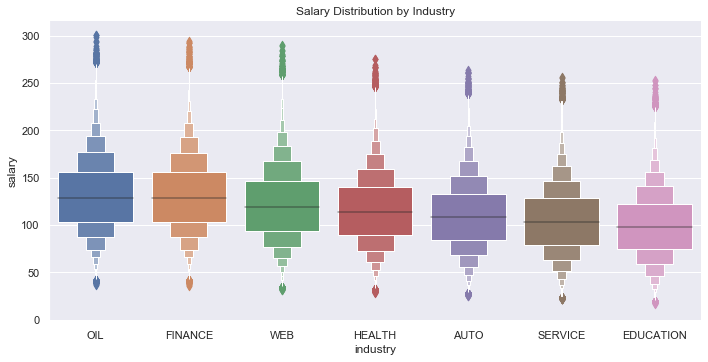

In [21]:
sns.catplot(x='industry', y='salary', kind='boxen',data=df.sort_values('industry', ascending=False),height = 5 , aspect = 2,
           order = ["OIL","FINANCE","WEB","HEALTH","AUTO","SERVICE","EDUCATION"])
plt.title("Salary Distribution by Industry")
plt.show()

###### Given current economy, it is not a surprised that Web and Finance industry are 2 of the top 3 industires. However, Oil industry has the highest mean salary

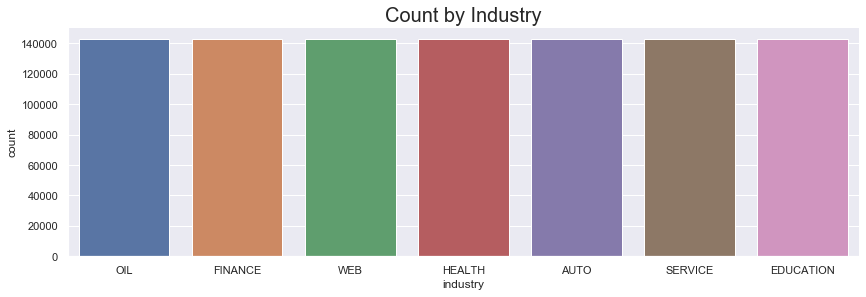

In [22]:
sns.catplot(x='industry', data=df, kind='count',height =4, aspect = 3, order =["OIL","FINANCE","WEB","HEALTH","AUTO","SERVICE","EDUCATION"] )
plt.title('Count by Industry', fontsize=20)
plt.show()

In [23]:
degree_summary = df.groupby("degree")
degree_summary.describe()

YrsExp                                                   \
                count       mean       std  min  25%   50%   75%   max   
degree                                                                   
BACHELORS    175495.0  11.986045  7.218162  0.0  6.0  12.0  18.0  24.0   
DOCTORAL     175362.0  12.003279  7.214571  0.0  6.0  12.0  18.0  24.0   
HIGH_SCHOOL  236975.0  11.995519  7.210805  0.0  6.0  12.0  18.0  24.0   
MASTERS      175310.0  11.984987  7.203709  0.0  6.0  12.0  18.0  24.0   
NONE         236853.0  11.991450  7.214551  0.0  6.0  12.0  18.0  24.0   

            MilesfMetropolis             ...                salary  \
                       count       mean  ...   75%   max     count   
degree                                   ...                         
BACHELORS           175495.0  49.589646  ...  75.0  99.0  175495.0   
DOCTORAL            175362.0  49.609020  ...  75.0  99.0  175362.0   
HIGH_SCHOOL         236975.0  49.459310  ...  74.0  99.0  236975.0   
MASTERS             175310.0  49.554064  ...  75.0  99.0  175310.0   
NONE                236853.0  49.477600  ...  74.0  99.0  236853.0   

                                                                      
                   mean        std   min    25%    50%    75%    max  
degree                                                                
BACHELORS    125.454663  35.042720  35.0  100.0  122.0  148.0  294.0  
DOCTORAL     135.490979  35.790555  45.0  109.0  132.0  158.0  301.0  
HIGH_SCHOOL  101.921085  36.112684  18.0   75.0   99.0  125.0  260.0  
MASTERS      130.505647  35.399830  38.0  105.0  127.0  153.0  301.0  
NONE          98.176882  34.915141  17.0   72.0   95.0  121.0  254.0  

[5 rows x 24 columns]

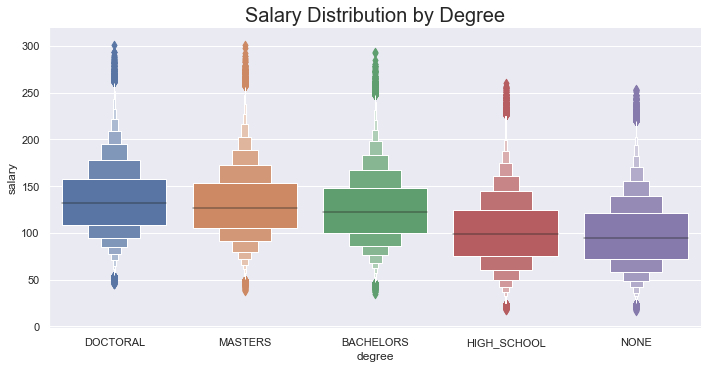

In [24]:
#Using IQR method to detech outlier: 1.5(141-88) = 79.5;  lets assume Q3 = 150 ; therefore anything greater than 230 is consdiered outliers 

sns.catplot(x='degree', y='salary', kind='boxen', data = df, height = 5, aspect =2, order=['DOCTORAL', 'MASTERS', 'BACHELORS', "HIGH_SCHOOL", 'NONE'])
plt.title("Salary Distribution by Degree", fontsize = 20)
plt.show()

###### Generally speaking, those who have a bachelors degree or higher have a mean salary greater than high_school or none degree owners. However, there is no significance difference in the mean salary of higher education group. Doctoral degree owners only have a slighly better mean salary than masters degreee holders.

In [25]:
#Count percentage of outliers 

percentage = len(df[df.salary > 230])/ len(df["salary"])
print(f'There are about {percentage:.3} % of data considered outliers')

There are about 0.00368 % of data considered outliers


###### less than 1% of data points are consdiered outliers; thus, keep these outliers

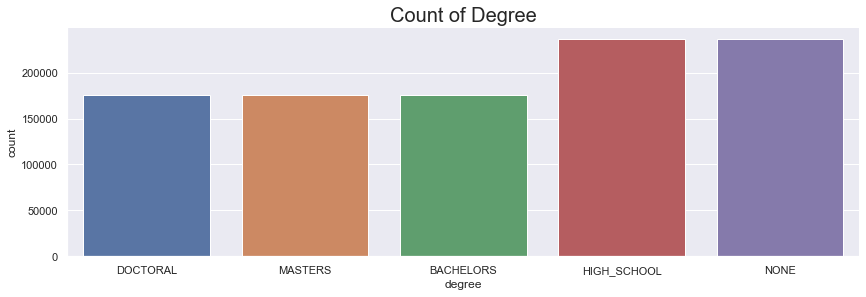

In [26]:
sns.catplot(x='degree', kind='count',data=df, height=4,aspect=3, order=['DOCTORAL', 'MASTERS', 'BACHELORS', "HIGH_SCHOOL", 'NONE'])
plt.title('Count of Degree', fontsize=20)
plt.show()

###### This dataset seems really balanced in terms of distribution of each categorical variable: the job type count is roughly the same for all job types, there is only slightly more people with no major/without post-secondary education in the dataset than their higher education degree counterparts, and all industries and companies are represented roughly equally. This is a good sample in no need for applying any resampling methods.

##### EDA Section recap: 
   1. less than 1% of data points are considered outliers, do not remove them 
   2. The dataset seems really balanced in terms of distribution of each categorical variable
   3. There is no significance difference in the mean salary of higher education group compare to high_school and none holders
   4. Oil industry has the highest mean salary follow by Web and finance industry 

### ---- 5 Preprocessing  ----

###### Because this is a regression problem with the dependent variable being a continuous one, MSE is a simple and fitting choice to use it as a metric for my model. As my baseline model, I will use difference from average salary, since every ML model should be able to outperform differences from the mean.

In [27]:
#create dummy series and append concat with original data df

dummy_1 = pd.get_dummies(df["JobType"], prefix='JobType')
df = pd.concat([df, dummy_1], axis=1)
df.drop("JobType", axis = 1, inplace=True)

dummy_2 = pd.get_dummies(df["industry"], prefix='industry')
df = pd.concat([df, dummy_2], axis=1)
df.drop("industry", axis = 1, inplace=True)

dummy_3 = pd.get_dummies(df["degree"], prefix='degree')
df = pd.concat([df, dummy_3], axis=1)
df.drop("degree", axis = 1, inplace=True)

dummy_4 = pd.get_dummies(df["major"], prefix='major')
df = pd.concat([df, dummy_4], axis=1)
df.drop("major", axis = 1, inplace=True)

dummy_5 = pd.get_dummies(df["companyId"])
df = pd.concat([df, dummy_5], axis=1)
df.drop("companyId", axis = 1, inplace=True)

In [28]:
#create dummy series and append concat with test_df

test_dummy_1 = pd.get_dummies(df_test["jobType"])
df_test = pd.concat([df_test, test_dummy_1], axis=1)
df_test.drop("jobType", axis = 1, inplace=True)

test_dummy_2 = pd.get_dummies(df_test["industry"], prefix='industry')
df_test = pd.concat([df_test, test_dummy_2], axis=1)
df_test.drop("industry", axis = 1, inplace=True)

test_dummy_3 = pd.get_dummies(df_test["degree"], prefix='degree')
df_test = pd.concat([df_test, test_dummy_3], axis=1)
df_test.drop("degree", axis = 1, inplace=True)

test_dummy_4 = pd.get_dummies(df_test["major"], prefix='major')
df_test = pd.concat([df_test, test_dummy_4], axis=1)
df_test.drop("major", axis = 1, inplace=True)

test_dummy_5 = pd.get_dummies(df_test["companyId"])
df_test = pd.concat([df_test, test_dummy_5], axis=1)
df_test.drop("companyId", axis = 1, inplace=True)

### ---- 6 Establish a baseline ----

In [29]:
#extract our target 
target = df["salary"]

#creating a baseline model, using just average, manually computing MSE
mean_salary = target.mean()
df["salary_pred"]= mean_salary
df["salary_dif"]=df["salary"]-df["salary_pred"]
df["salary_dif_squared"]=df["salary_dif"]**2
df["salary_sum"]=df["salary_dif_squared"].sum()
df["salary_MSE"]=df["salary_sum"]/df["salary_sum"].count()

print(f"The MSE of the model using means is: {df['salary_MSE'][0]}" )

#dropping the variables from the dataset
df.drop(["salary","salary_pred","salary_dif","salary_dif_squared","salary_sum","salary_MSE", 'jobId'], axis=1,inplace=True)

The MSE of the model using means is: 1499.0172415563363


### ---- 7 Hypothesize solution ----

###### The MSE from my simple model using only means is very high, I need to come up with models that will improve the MSE. My models of choice are:

    1. Linear Regression: our data follows a linear shape according to the EDA
    2. Decision Trees: DT is a basic and fast approach for modeling, and performs well with linear relationships problems
    3. Gradient Boosting: Given a regression problem, gradient boosting offers great way for weak learners to improve their performance, and is often used to minimize the MSE

In [30]:
#releasing memory
import gc
gc.collect()

46624

## Part 3 - DEVELOP

In [31]:
#calculating MSE for Linear Regression

#importing packages
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

#fitting the model
lm = LinearRegression()
lm.fit(df,target)

#measuring MSE during 5-fold cross-validation and printing the result
lm_scores = cross_val_score(lm,df,target,scoring="neg_mean_squared_error")
lm_mse = -1*lm_scores.mean()
print(f"The average MSE for linear regression: {lm_mse}")

The average MSE for linear regression: 384.4437712452185


In [32]:
#calculating MSE for Decision Trees, repeating the process
from sklearn import tree

dt = tree.DecisionTreeRegressor()
dt.fit(df,target)

dt_scores = cross_val_score(dt,df,target,scoring="neg_mean_squared_error")
dt_mse = -1*dt_scores.mean()
print(f"Average MSE for decision tree model: {dt_mse}")

Average MSE for decision tree model: 700.992387038324


In [33]:
#calculating MSE for Gradient Boosting, repeating the process with 10 folds cross validation
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=150, max_depth=5)
gb.fit(df,target)

gb_scores = cross_val_score(gb,df,target,scoring="neg_mean_squared_error")
gb_mse = -1*gb_scores.mean()
print(f"Average MSE for gradient boosting model: {gb_mse}")

Average MSE for gradient boosting model: 356.90919805006985


###### The lowest average MSE has been reached by the gradient boosting model. I will use this model to predict the test dataset, and analyze which features are the most important for the prediction.

## Part 4 - DEPLOY

In [34]:
#saving the gradient boosting model
import joblib
joblib_file = "GB_salary_model.pkl"
joblib.dump(gb, joblib_file)

#loading the saved model
model = joblib.load("GB_salary_model.pkl")
print("The model used is:", model)

The model used is: GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [38]:
#pre-processing the test dataset

df_test =df_test.drop('jobId', axis=1).drop_duplicates()

In [42]:
#predict the test dataset
salary_predictions = model.predict(df_test)

#saving the predictions
np.savetxt('salary_predictions.csv', salary_predictions, delimiter=',')

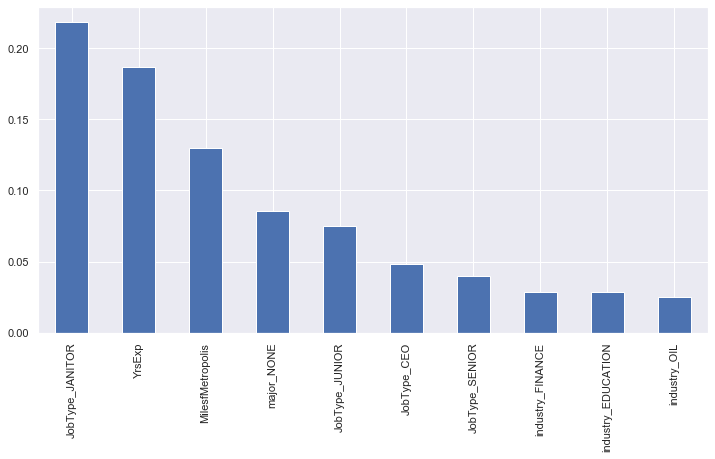

In [43]:
#showing feature importances
importances = pd.Series(model.feature_importances_, index=df.columns)
importances.nlargest(10).plot(kind='bar', figsize=(12,6))
plt.show()

#saving feature importances
np.savetxt('salary_importances.csv', importances, delimiter=',')

## Summary

###### I have developed a model that can predict future salaries of job postings based on salaries of current job postings. After performing the exploratory data analysis, I developed three models and compared their mean squared errors to measure the performance against the baseline model. Gradient boosting model  performs the best with the train data. I used the model to predict the salary of test data, and saved the results of the prediction in a csv file. I also included the analysis of feature importances, and saved it in a separate csv file.